In [52]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [53]:
dataset = pd.read_csv('50_Startups.csv')

In [54]:
# Analyzing the data

In [55]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [57]:
#  Numerical/Statistical analysis of the dataset

In [58]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [59]:
# Dimension of Dataset

In [60]:
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')

There are  50 rows and  5 columns in the dataset.


In [61]:
# Here we are trying to check if there are repeated values in the dataset or not.

In [62]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [63]:
# Check for NULL values

In [64]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [65]:
# Schema of dataset

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [67]:
# From the corr function, we can find the correlation between the columns.
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


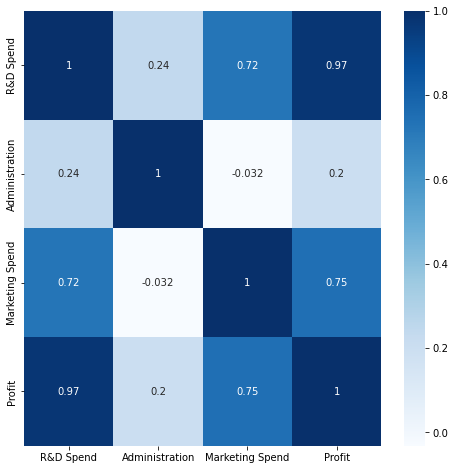

In [68]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

In [69]:
# Outliers detection in the target variable

In [70]:
# IQR
Q1 = np.percentile(dataset['Profit'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dataset['Profit'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [71]:
print("Old Shape: ", dataset.shape)

Old Shape:  (50, 5)


In [72]:
# Upper bound
upper = np.where(dataset['Profit'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dataset['Profit'] <= (Q1-1.5*IQR))

In [73]:
''' Removing the Outliers '''
dataset.drop(upper[0], inplace = True)
dataset.drop(lower[0], inplace = True)
 
print("New Shape: ", dataset.shape)

New Shape:  (49, 5)


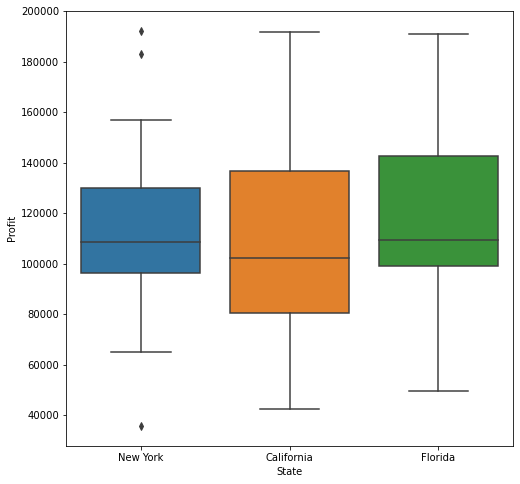

In [74]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


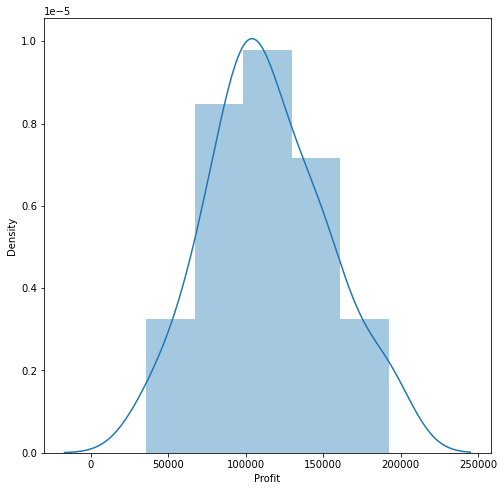

In [75]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

# Model Development

In [76]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Label Encoder

In [77]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [78]:
# Now we have to split the data into training and testing data

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[153441.51, 101145.55, 407934.54, 1],
       [1315.46, 115816.21, 297114.46, 1],
       [91749.16, 114175.79, 294919.57, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [66051.52, 182645.56, 118148.2, 1],
       [73994.56, 122782.75, 303319.26, 1],
       [78013.11, 121597.55, 264346.06, 0],
       [27892.92, 84710.77, 164470.71, 1],
       [76253.86, 113867.3, 298664.47, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [46014.02, 85047.44, 205517.64, 2],
       [119943.24, 156547.42, 256512.92, 1],
       [20229.59, 65947.93, 185265.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [15505.73, 127382.3, 35534.17, 2],
       [77044.01, 99281.34, 140574.81, 2],
       [134615.46, 147198.87, 127716.82,

# Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [81]:
# Testing the model using predict Function

y_pred = model.predict(x_test)
y_pred

array([103762.80832831, 172191.22680368, 112117.94221823, 102825.76626348,
       101939.1936509 ,  94348.08472526,  89208.6407359 ,  77289.03760658,
       158506.7952687 , 136927.36199558, 137186.04705242,  99950.40180605,
       100510.95341973, 114535.87754176,  57492.60423801])

In [82]:
testing_data_model_score = model.score(x_test, y_test)
print(testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print(training_data_model_score)

0.9406513623018572
0.9635364269100082


In [83]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
0,103762.808328,101004.64
1,172191.226804,166187.94
2,112117.942218,105733.54
3,102825.766263,99937.59
4,101939.193651,97427.84
5,94348.084725,89949.14
6,89208.640736,96712.80
7,77289.037607,78239.91
8,158506.795269,155752.60
9,136927.361996,146121.95


In [84]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 92.6828972620124


# R^2 Table

In [85]:
d2={'Prep_Models':['Model'],'Rsquared':[r2Score]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.926829
